**TASK-6 : USING DECISION TREE CLASSIFIER TO DO PREDICTIONS.**

**Author - M.JANARDHAN**

**GRIPAUG2021 @ The Sparks Foundation**

**Data Science and Business Analytics intern**


The task here is to create a decision tree classifier and visualize it for the given Iris dataset.The purpose is to feed any input and the model should be able to predict the class accordingly. It is a versatile ML algorithm used for classification as well as regression.

**STEP 1:** *Importing the libraries needed for the task!*

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
plt.style.use(["Solarize_Light2","seaborn-bright"])
import warnings
warnings.filterwarnings(action = 'ignore')

**STEP 2:** *Loading the data*

In [28]:
Iris_data=pd.read_csv('Iris.csv',index_col=0)
Iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
Iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


**STEP 3:** *Exploratory Data analysis*
      
1.   Getting to know the data 
2.   Missing values
3.   Visualizations



In [31]:
print(Iris_data.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [32]:
print(Iris_data['Species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [33]:
Iris_data.shape

(150, 5)

Relationship between independent variables!

In [34]:
correlation = Iris_data.corr()
print(correlation)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


[]

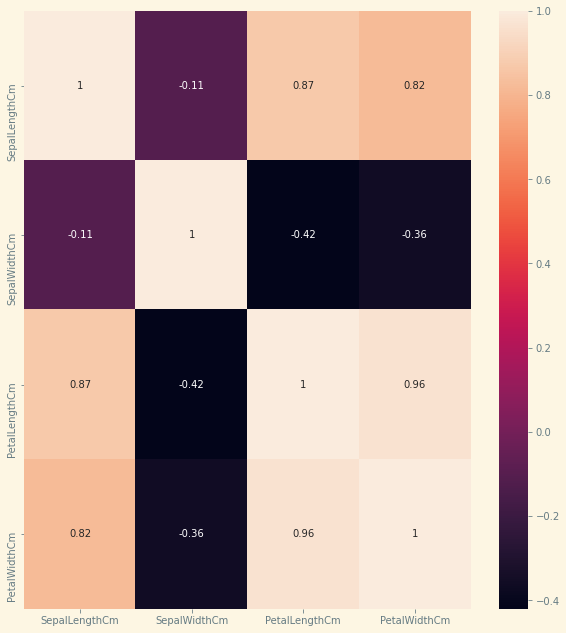

In [40]:
plt.figure(figsize=(10,11))
sns.heatmap(correlation,annot=True)
plt.plot()

 *VISUALIZATIONS!* 

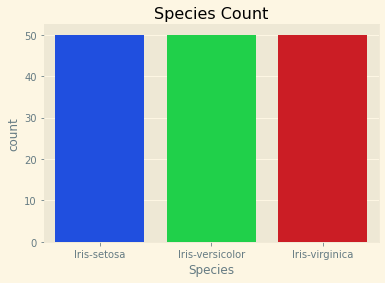

In [35]:
plt.title('Species Count')
sns.countplot(Iris_data['Species'])

Comparison between various species based on sepal length and width!

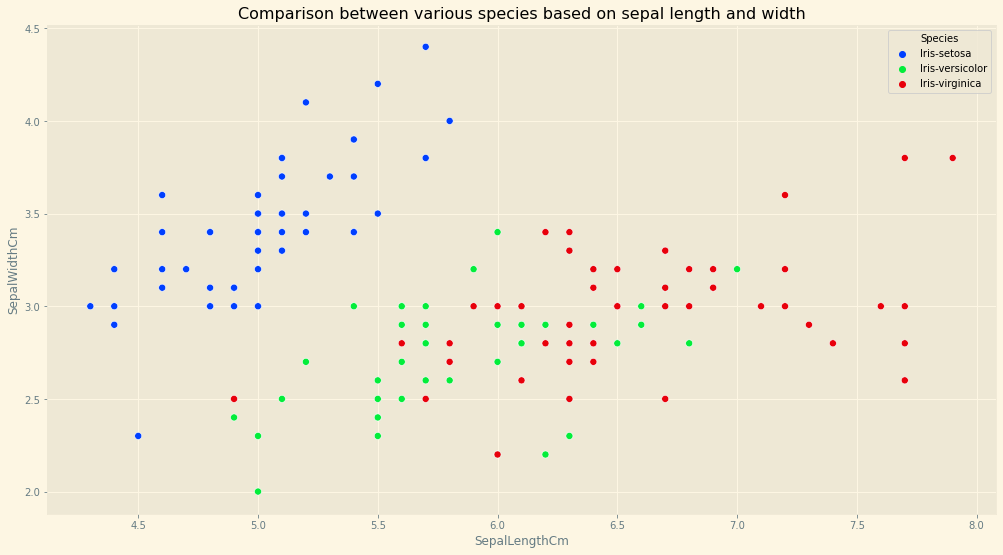

In [38]:
plt.figure(figsize=(17,9))
plt.title('Comparison between various species based on sepal length and width')
sns.scatterplot(Iris_data['SepalLengthCm'],Iris_data['SepalWidthCm'],hue =Iris_data['Species'],s=50)

Comparison between various species based on petal length and width!

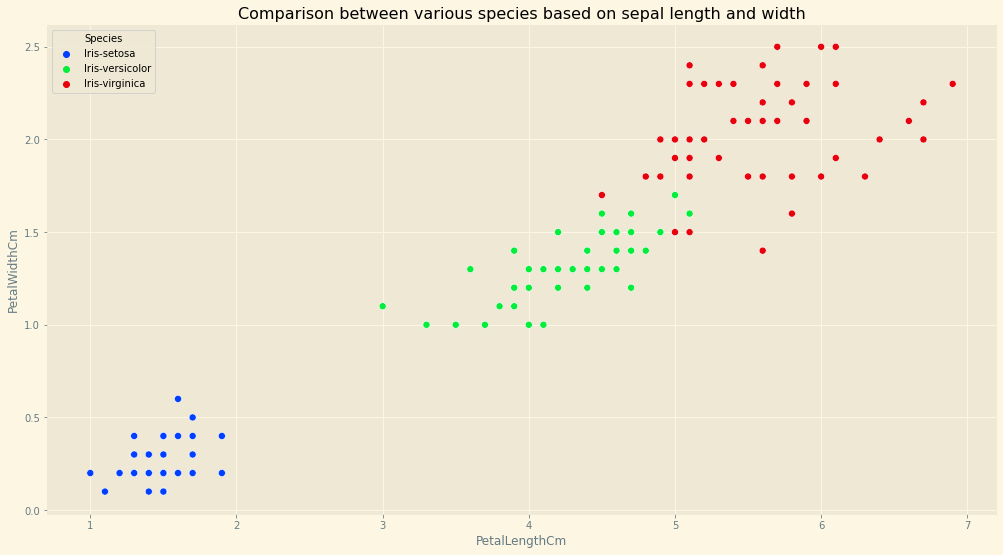

In [39]:
plt.figure(figsize=(17,9))
plt.title('Comparison between various species based on sepal length and width')
sns.scatterplot(Iris_data['PetalLengthCm'],Iris_data['PetalWidthCm'],hue =Iris_data['Species'],s=50)

**STEP 4:** Splitting the data!

In [41]:
X= Iris_data.drop(columns=['Species'])
y= Iris_data['Species']

In [42]:
#scaling is done to bring feature values between 0 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [81]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105,), (45,))

**STEP 5:** Model building and predictions!

In [99]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

In [100]:
print(predictions[:30])

['Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor']


**STEP 6:** Evaluation metrics!

In [101]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [102]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.98        45
      macro avg       0.97      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



In [103]:
print(accuracy_score(y_test,predictions))

0.9777777777777777


In [104]:
conf_matrix = confusion_matrix(y_test,predictions)

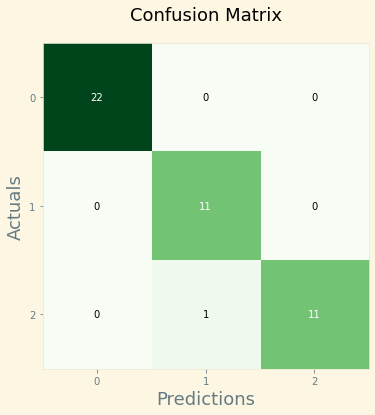

In [105]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

The accuracy of this model is found out to be 0.977 or 97.777%. This is due to the reason that the dataset is too small and the test data are part of the training data.

**STEP 7:** Predicting the class for some random petal and sepal width and height 

In [106]:
print("Output = ",clf.predict([[4.7,3.2,1.3,0.2]]))

Output =  ['Iris-setosa']


This predicition seems to be correct because if we check our scatter plot for various petal dimensions, Iris-setosa had small values for width as well as length of petals.

**STEP 8:** Visualization of the Decision Tree!

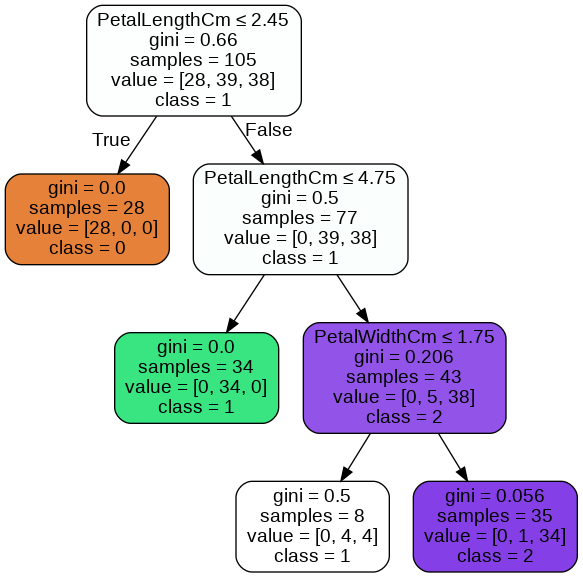

In [108]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Flowers.png')
Image(graph.create_png())

**CONCLUSION:** Thus, a decision tree classifier was created for the given dataset Iris and the visualization of it has been done.
The model accuracy comes out to be 97.77%